In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import altair as alt
from IPython.display import display
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv(r'basic_type_data.csv')

In [3]:
data1 = data.copy()

In [4]:
data1.shape

(2637014, 28)

In [5]:
data1['proposal_title'].nunique()

114

In [6]:
data1.columns

Index(['Unnamed: 0', 'vote_id', 'voter', 'voting_power', 'vote_date',
       'voting_reason', 'vote_year', 'vote_month', 'vote_day', 'vote_time',
       'vote_hour', 'vote_minute', 'vote_year_month', 'voting_power_range',
       'proposal_id', 'proposal_title', 'proposal_body', 'proposal_type',
       'proposal_created', 'proposal_start_date', 'proposal_end_date',
       'proposal_year', 'proposal_month', 'proposal_day', 'proposal_time',
       'proposal_choices', 'voting_choice', 'mapped_choice'],
      dtype='object')

In [7]:
data1.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
# Pivot the DataFrame to create a new DataFrame with voters as rows and proposals as columns
voters_proposals = data1.pivot_table(values='voting_power', index='voter', columns='proposal_title', fill_value=0)

# Reset the index to make 'voter' a regular column
voters_proposals.reset_index(inplace=True)

# Create a DataFrame with voter addresses
voter = data1['voter'].drop_duplicates()

# Merge the two DataFrames based on 'voter'
result_df = pd.merge(voter, voters_proposals, on='voter')

# Rename the columns for better clarity
result_df.columns = ['voter'] + [f'{proposal}' for proposal in result_df.columns[1:]]

In [9]:
# Count the unique proposals
proposals_count = data1['proposal_title'].nunique()

# Group the data by 'voter' and count the total unique proposals each voter voted for
vote_counts = data1.groupby('voter')['proposal_title'].nunique().reset_index(name='proposals_voted_for')

In [10]:
# # Filter out voters who voted for all unique proposals
# voters = vote_counts[vote_counts['proposals_voted_for'] == proposals_count]

# # Get the count of voters who voted for all unique proposals
# count_proposals = len(voters)

# print(f"Number of voters who voted for all unique proposals: {count_proposals}")

In [11]:
vote_counts

,voter,proposals_voted_for
0,0x00000000051CBcE3fD04148CcE2c0adc7c651829,1
1,0x000000000A38444e0a6E37d3b630d7e855a7cb13,10
2,0x000000006F457c0f8F560333d9c2877287d92a92,102
3,0x00000001985C6A08963eEf53821c78aa84318B42,6
4,0x00000001B01122945D67Cf7c972f1a2063Ca4008,5
...,...,...
144261,0xffeb5154B33A7FeA9f81aCe866785F6538652884,108
144262,0xffec9E15a95845b6720A7e7ea5F65e97EaeAd3e8,7
144263,0xfff65670f19cE7E48d6ffAd7A679FA9A7e0c5e97,101
144264,0xfff69ccaffd53e68b056d0E7D24fC941B033EEc3,1


In [12]:
result_df = pd.merge(result_df, vote_counts, on='voter')

In [13]:
result_df

,voter,0xGen STIP Proposal - Round 1,AIP 1.05: Return 700M $ARB to the DAO Treasury [REAL],"AIP-1.1 - Lockup, Budget, Transparency",AIP-1.2 - Foundation and DAO Governance,AIP-1: Arbitrum Improvement Proposal Framework,ALAYA STIP Proposal - Round 1,Abracadabra DAO STIP Proposal - Round 1,Accelerating Arbitrum - leveraging Camelot as an ecosystem hub to support native builders,Angle Protocol STIP Proposal - Round 1,...,Wormhole STIP Proposal - Round 1,XY STIP Proposal - Round 1,ZKasino STIP Proposal - Round 1,[Non-Constitutional] Fund the Arbitrum Grants Framework Proposal Milestone 1,[Non-Constitutional]: Arbitrum Stable Treasury Endowment Program,dForce STIP Proposal - Round 1,iZUMi STIP Proposal - Round 1,tBTC STIP Proposal - Round 1,unshETH STIP Proposal - Round 1,proposals_voted_for
0,0xcC953B343fDC81E70FE7C0097629E1eAD46C927C,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,30.017713,0.000000,0.000000,0.000000,0.000000,3
1,0x157F41B3B83A8E41354A2393C4E6AB6702C0e7d9,1200.045368,3999.045368,3999.045368,3999.045368,3000.00,1200.045368,1200.045368,1200.045368,1200.045368,...,1200.045368,1200.045368,1200.045368,0.000000,700.042374,1200.045368,1200.045368,1200.045368,1200.045368,112
2,0xA38092428628b7f1507FfB77624b4760732c7A28,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,50.768444,0.000000,...,0.000000,0.000000,0.000000,50.768444,317.424181,0.000000,0.000000,0.000000,0.000000,15
3,0x3aceB77bf88c3A92079BAa8dB3Ddb172e3636Bb7,0.000000,50.000000,50.000000,50.000000,0.00,0.000000,0.000000,50.000000,0.000000,...,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,50.000000,0.000000,0.000000,19
4,0xf9cb583de6B3375A8CCd32be172Fd810B69a0eE7,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,101.011000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144261,0x297d2B80728966F8B6aadE2f1A0016aD5E479084,0.000000,0.000000,0.000000,0.000000,18181.98,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
144262,0xc68BC30EC0847E856E19a621aA17C485f49e3c13,0.000000,0.000000,0.000000,0.000000,1250.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
144263,0x0569A2073A5C573d9D41010f801834ae9848Ca3b,0.000000,0.000000,0.000000,0.000000,2750.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
144264,0x809386596CA2F65982d25131F4D210D081BE4bC0,0.000000,0.000000,0.000000,0.000000,100.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [14]:
# Calculate the total voting power for each voter
result_df['total_voting_power'] = result_df.drop(columns='voter').sum(axis=1)

# Calculate the average voting power
result_df['average_voting_power'] = result_df['total_voting_power'] / result_df['proposals_voted_for']

# Display the DataFrame with voter addresses and total voting power
result_df[['voter', 'total_voting_power', 'proposals_voted_for', 'average_voting_power']]

,voter,total_voting_power,proposals_voted_for,average_voting_power
0,0xcC953B343fDC81E70FE7C0097629E1eAD46C927C,91.253190,3,30.417730
1,0x157F41B3B83A8E41354A2393C4E6AB6702C0e7d9,144214.023925,112,1287.625214
2,0xA38092428628b7f1507FfB77624b4760732c7A28,1043.182396,15,69.545493
3,0x3aceB77bf88c3A92079BAa8dB3Ddb172e3636Bb7,921.000000,19,48.473684
4,0xf9cb583de6B3375A8CCd32be172Fd810B69a0eE7,102.011000,1,102.011000
...,...,...,...,...
144261,0x297d2B80728966F8B6aadE2f1A0016aD5E479084,18182.980000,1,18182.980000
144262,0xc68BC30EC0847E856E19a621aA17C485f49e3c13,1251.000000,1,1251.000000
144263,0x0569A2073A5C573d9D41010f801834ae9848Ca3b,2751.000000,1,2751.000000
144264,0x809386596CA2F65982d25131F4D210D081BE4bC0,101.000000,1,101.000000


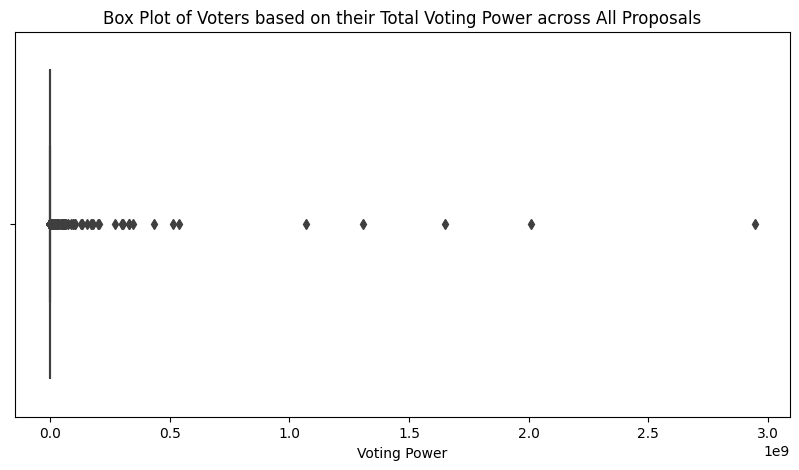

In [15]:
# Create a box plot of average voting power using Seaborn
plt.figure(figsize=(10, 5))
sns.boxplot(x=result_df['total_voting_power'])
plt.xlabel('Voting Power')
plt.title('Box Plot of Voters based on their Total Voting Power across All Proposals')
plt.show()

In [16]:
# Summary statistics
summary_stats = result_df['total_voting_power'].describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
count    1.442660e+05
mean     1.150969e+05
std      1.179447e+07
min      1.000000e+00
25%      1.100000e+01
50%      5.917106e+01
75%      5.010623e+02
max      2.944637e+09
Name: total_voting_power, dtype: float64


In [17]:
result_df[result_df['total_voting_power'] == 2944636576.9564233]

,voter,0xGen STIP Proposal - Round 1,AIP 1.05: Return 700M $ARB to the DAO Treasury [REAL],"AIP-1.1 - Lockup, Budget, Transparency",AIP-1.2 - Foundation and DAO Governance,AIP-1: Arbitrum Improvement Proposal Framework,ALAYA STIP Proposal - Round 1,Abracadabra DAO STIP Proposal - Round 1,Accelerating Arbitrum - leveraging Camelot as an ecosystem hub to support native builders,Angle Protocol STIP Proposal - Round 1,...,ZKasino STIP Proposal - Round 1,[Non-Constitutional] Fund the Arbitrum Grants Framework Proposal Milestone 1,[Non-Constitutional]: Arbitrum Stable Treasury Endowment Program,dForce STIP Proposal - Round 1,iZUMi STIP Proposal - Round 1,tBTC STIP Proposal - Round 1,unshETH STIP Proposal - Round 1,proposals_voted_for,total_voting_power,average_voting_power
24895,0x0eB5B03c0303f2F47cD81d7BE4275AF8Ed347576,2.755511e+07,2.127950e+07,2.027193e+07,2.027346e+07,2.129914e+07,2.755511e+07,2.755511e+07,2.995473e+07,2.755511e+07,...,2.755511e+07,0.0,2.278913e+07,2.755511e+07,2.755511e+07,2.755511e+07,2.755511e+07,108,2.944637e+09,2.726515e+07


In [18]:
# Summary statistics
summary_stats = result_df['average_voting_power'].describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
count    1.442660e+05
mean     2.096475e+03
std      1.328660e+05
min      1.000000e+00
25%      2.137498e+00
50%      6.000000e+00
75%      5.123961e+01
max      2.726515e+07
Name: average_voting_power, dtype: float64


In [19]:
# # Create an interactive KDE plot using Plotly
# fig = px.histogram(result_df, x='average_voting_power', marginal='rug', nbins=20, opacity=0.7)

# # Calculate mean and median
# mean_val = result_df['average_voting_power'].mean()

# # Add vertical lines for mean and median
# fig.add_vline(x=mean_val, line_dash="solid", line_color="green", annotation_text=f"Mean: {mean_val:.2f}")

# fig.update_layout(
#     title='Interactive KDE Plot of Voting Power with Mean',
#     xaxis_title='Average Voting Power',
#     yaxis_title='Density',
#     bargap=0.1,
#     showlegend=False
# )
# fig.show()
# fig.write_html(r'Graphs\avg-power-dis.html')

## Identifying the outliers

In [20]:
# Calculate quartiles and IQR
Q1 = result_df['average_voting_power'].quantile(0.25)
Q3 = result_df['average_voting_power'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
threshold = 1.5 * IQR

# Identify outliers
outliers = result_df[(result_df['average_voting_power'] < (Q1 - threshold)) | (result_df['average_voting_power'] > (Q3 + threshold))]

print("Identified Outliers:")
outliers

Identified Outliers:


,voter,0xGen STIP Proposal - Round 1,AIP 1.05: Return 700M $ARB to the DAO Treasury [REAL],"AIP-1.1 - Lockup, Budget, Transparency",AIP-1.2 - Foundation and DAO Governance,AIP-1: Arbitrum Improvement Proposal Framework,ALAYA STIP Proposal - Round 1,Abracadabra DAO STIP Proposal - Round 1,Accelerating Arbitrum - leveraging Camelot as an ecosystem hub to support native builders,Angle Protocol STIP Proposal - Round 1,...,ZKasino STIP Proposal - Round 1,[Non-Constitutional] Fund the Arbitrum Grants Framework Proposal Milestone 1,[Non-Constitutional]: Arbitrum Stable Treasury Endowment Program,dForce STIP Proposal - Round 1,iZUMi STIP Proposal - Round 1,tBTC STIP Proposal - Round 1,unshETH STIP Proposal - Round 1,proposals_voted_for,total_voting_power,average_voting_power
1,0x157F41B3B83A8E41354A2393C4E6AB6702C0e7d9,1200.045368,3999.045368,3999.045368,3999.045368,3000.000,1200.045368,1200.045368,1200.045368,1200.045368,...,1200.045368,0.00,700.042374,1200.045368,1200.045368,1200.045368,1200.045368,112,144214.023925,1287.625214
11,0x1be32718D0e44B0140FaC069bDE714e4aC920d90,0.000000,1875.000000,1875.000000,1875.000000,1875.000,48.280000,0.000000,75.780000,48.280000,...,48.280000,75.78,48.303907,0.000000,48.280000,48.280000,0.000000,83,11599.655629,139.754887
31,0x2C2ca72774795929ce84fC6Ffde4A9bf47230895,0.000000,7170.000000,7170.000000,7170.000000,3445.000,156.356585,0.000000,0.000000,156.356585,...,156.356585,0.00,4.352147,156.356585,156.356585,156.356585,0.000000,65,34204.034073,526.215909
33,0xd2eb12C78151d6c51932cDcF2462f80b464452CB,0.000000,0.000000,0.000000,0.000000,2250.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,6.681291,0.000000,0.000000,0.000000,0.000000,2,2258.681291,1129.340646
35,0x75ddEE33eAddA49758F188E7fa84194e53222A70,0.000000,875.000000,875.000000,875.000000,0.000,0.000000,0.000000,875.000000,0.000000,...,0.000000,875.00,1999.961000,0.000000,0.000000,0.000000,0.000000,13,14762.883000,1135.606385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144258,0xb62cfE1F3E9EF4B43022656173Bf50489D74729a,0.000000,0.000000,0.000000,0.000000,800.006,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1,801.006000,801.006000
144259,0x0008906cA2e1d42DFb6BbCDA7f9B709A0cFA8dfc,0.000000,0.000000,0.000000,0.000000,2650.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1,2651.000000,2651.000000
144261,0x297d2B80728966F8B6aadE2f1A0016aD5E479084,0.000000,0.000000,0.000000,0.000000,18181.980,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1,18182.980000,18182.980000
144262,0xc68BC30EC0847E856E19a621aA17C485f49e3c13,0.000000,0.000000,0.000000,0.000000,1250.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1,1251.000000,1251.000000


## Distribution of voters based on different ranges of voting power:

### Bar Chart

In [21]:
# Define ranges for voting power bins
bins = [0, 100, 500, 1000, 10000, 100000, 1000000, 10000000, 30000000]  # Define bins up to the maximum count of average voting power

# Bin voters based on average voting power
result_df['voting_power_bin'] = pd.cut(result_df['average_voting_power'], bins=bins, 
                                       labels=['<100', '100-500', '500-1K', '1K-10K', '10K-100K', '100K-1M', '1M-10M', '10M-30M'])

# Count the number of voters in each bin
bin_counts = result_df['voting_power_bin'].value_counts().sort_index()

# Calculate percentages
percentages = (bin_counts / bin_counts.sum()) * 100

# Plot an interactive bar chart to visualize the distribution of voters across bins
fig = px.bar(x=bin_counts.index, y=bin_counts.values, color=bin_counts.index, labels={'x': 'Voting Power Range', 'y': 'Number of Voters'}, 
             title='Distribution of Voters Based on Voting Power', text=percentages.round(2).astype(str) + '%')

fig.update_traces(textposition='outside')

fig.update_layout(xaxis={'categoryorder':'total descending'}, 
                  yaxis_title='Number of Voters',
                  xaxis_title='Voting Power Range',
                  yaxis=dict(showgrid=True))

fig.show()
fig.write_html(r'Graphs\voting-power-ranges-bar.html')

### Pie Chart

In [22]:
# Define ranges for voting power bins
bins = [0, 100, 500, 1000, 10000, 100000, 1000000, 30000000]  # Define bins up to the maximum count of average voting power

# Bin voters based on average voting power
result_df['voting_power_bin'] = pd.cut(result_df['average_voting_power'], bins=bins, 
                                       labels=['<100', '100-500', '500-1K', '1K-10K', '10K-100K', '100K-1M', '1M-30M'])

# Count the number of voters in each bin
bin_counts = result_df['voting_power_bin'].value_counts().sort_index()

# Calculate percentages
percentages = round((bin_counts / bin_counts.sum()) * 100, 2)

# Create a pie chart to visualize the distribution of voters across bins
fig_pie = px.pie(names=bin_counts.index, values=bin_counts.values, 
                 title='Distribution of Voters Based on Voting Power')

fig_pie.update_traces(textinfo='percent+label')

fig_pie.show()
fig_pie.write_html(r'Graphs\voting-power-ranges-pie.html')

In [23]:
# Create DataFrame to display counts
df_counts = pd.DataFrame({'Voting Power Range': bin_counts.index, 'Number of Voters': bin_counts.values, 'Percentage': percentages})

print(df_counts)

         Voting Power Range  Number of Voters  Percentage
<100                   <100            114104       79.09
100-500             100-500             13995        9.70
500-1K               500-1K              6703        4.65
1K-10K               1K-10K              9002        6.24
10K-100K           10K-100K               336        0.23
100K-1M             100K-1M                84        0.06
1M-30M               1M-30M                42        0.03


In [24]:
# Define ranges for voting power bins based on quartiles
bins = [0, 2, 6, 51, 27265153.490337253, float('inf')]  # Define bins based on quartiles
labels = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5']  # Labels for the bins

# Bin voters based on average voting power
result_df['voting_power_bin'] = pd.cut(result_df['average_voting_power'], bins=bins, labels=labels)

# Count the number of voters in each bin
bin_counts = result_df['voting_power_bin'].value_counts().sort_index()

# Calculate percentages
percentages = round((bin_counts / bin_counts.sum()) * 100, 2)

# Create DataFrame for table
table_df = pd.DataFrame({'Voting Power Range': bin_counts.index, 'Number of Voters': bin_counts.values, 'Percentage': percentages})

# Create bar chart
fig_bar = go.Figure(data=[go.Bar(x=bin_counts.index, y=bin_counts.values, text=percentages.round(2).astype(str) + '%')])
fig_bar.update_layout(
    title='Distribution of Voters Based on Voting Power Ranges',
    xaxis_title='Voting Power Range',
    yaxis_title='Number of Voters',
    xaxis=dict(categoryorder='total descending'),
    yaxis=dict(showgrid=True))

fig_bar.show()

In [25]:
# Display table
print(table_df.to_string(index=False))
# Optionally, you can save the table as an HTML file
table_df.to_html('voting_power_table.html', index=False)

Voting Power Range  Number of Voters  Percentage
             Bin 1             26046       18.05
             Bin 2             46218       32.04
             Bin 3             35581       24.66
             Bin 4             36421       25.25
             Bin 5                 0        0.00


# Voter Influence Analysis

## Clutster of Voters with more than 1M Voting Power

In [26]:
# Pivot the DataFrame to create a new DataFrame with voters as rows and proposals as columns
voters_proposals = data1.pivot_table(values='voting_power', index='voter', columns='proposal_title', fill_value=0)

# Reset the index to make 'voter' a regular column
voters_proposals.reset_index(inplace=True)

# Create a DataFrame with voter addresses
voter = data1['voter'].drop_duplicates()

# Merge the two DataFrames based on 'voter'
result_df1 = pd.merge(voter, voters_proposals, on='voter')

# Rename the columns for better clarity
result_df1.columns = ['voter'] + [f'{proposal}' for proposal in result_df1.columns[1:]]

In [27]:
# Assuming result_df is your DataFrame
voters_with_high_voting_power = result_df1[result_df1.iloc[:, 1:].max(axis=1) > 1000000]

# Display the resulting DataFrame
voters_with_high_voting_power

voters_with_high_voting_power.to_html('53-voters.html', index=False)

## Check the influence of voters with more than 1 million voting power on proposal outcomes:

### Calculating the total voting power of all the proposals

In [28]:
# Group by 'proposal_id' and sum up the 'voting_power' for each proposal
proposal_voting_power = data1.groupby('proposal_title')['voting_power'].sum()

# Reset index to make 'proposal_id' a regular column
proposal_voting_power = proposal_voting_power.reset_index()

# Display the DataFrame with total voting power for each proposal
proposal_voting_power

,proposal_title,voting_power
0,0xGen STIP Proposal - Round 1,1.126770e+08
1,AIP 1.05: Return 700M $ARB to the DAO Treasury...,1.408547e+08
2,"AIP-1.1 - Lockup, Budget, Transparency",1.396229e+08
3,AIP-1.2 - Foundation and DAO Governance,1.387616e+08
4,AIP-1: Arbitrum Improvement Proposal Framework,1.308752e+08
...,...,...
109,[Non-Constitutional]: Arbitrum Stable Treasury...,1.327322e+08
110,dForce STIP Proposal - Round 1,1.395754e+08
111,iZUMi STIP Proposal - Round 1,1.548327e+08
112,tBTC STIP Proposal - Round 1,1.106967e+08


In [29]:
# creating the array of voters with more than 1M voting power
voters = np.array(voters_with_high_voting_power['voter'])

### calculate the total voting power of voters with more than 1M voting power for each proposals and their percentage

In [30]:
# Create an empty list to store the total voting power values
total_voting_power_values = []

# Iterate over each proposal title in the proposal_voting_power DataFrame
for proposal_title in proposal_voting_power['proposal_title']:
    # Filter the DataFrame for the current proposal title and voters with high voting power
    df1 = data1[(data1['proposal_title'] == proposal_title) & data1['voter'].isin(voters)]

    # Calculate the sum of voting power for the filtered DataFrame
    total_voting_power = df1['voting_power'].sum()

    # Append the total voting power value to the list
    total_voting_power_values.append(total_voting_power)

# Add a new column 'total_voting_power' to the proposal_voting_power DataFrame
proposal_voting_power['voting_power_53'] = total_voting_power_values

# Calculate the percentage of voting_power_53 with respect to voting_power
proposal_voting_power['percentage_voting_power_53'] = round((proposal_voting_power['voting_power_53'] / proposal_voting_power['voting_power']) * 100, 2)

# Display the updated DataFrame
proposal_voting_power

,proposal_title,voting_power,voting_power_53,percentage_voting_power_53
0,0xGen STIP Proposal - Round 1,1.126770e+08,1.049758e+08,93.17
1,AIP 1.05: Return 700M $ARB to the DAO Treasury...,1.408547e+08,1.042077e+08,73.98
2,"AIP-1.1 - Lockup, Budget, Transparency",1.396229e+08,1.071956e+08,76.78
3,AIP-1.2 - Foundation and DAO Governance,1.387616e+08,1.064821e+08,76.74
4,AIP-1: Arbitrum Improvement Proposal Framework,1.308752e+08,9.524569e+07,72.78
...,...,...,...,...
109,[Non-Constitutional]: Arbitrum Stable Treasury...,1.327322e+08,1.252640e+08,94.37
110,dForce STIP Proposal - Round 1,1.395754e+08,1.300511e+08,93.18
111,iZUMi STIP Proposal - Round 1,1.548327e+08,1.390263e+08,89.79
112,tBTC STIP Proposal - Round 1,1.106967e+08,1.018666e+08,92.02


### filter the voters whose influence is more than 90% for one proposal

In [31]:
# Filter the proposals with percentage_voting_power_53 greater than 90
filtered_proposals = proposal_voting_power[proposal_voting_power['percentage_voting_power_53'] > 90]

# Display the filtered DataFrame
filtered_proposals

,proposal_title,voting_power,voting_power_53,percentage_voting_power_53
0,0xGen STIP Proposal - Round 1,1.126770e+08,1.049758e+08,93.17
5,ALAYA STIP Proposal - Round 1,1.179721e+08,1.070330e+08,90.73
6,Abracadabra DAO STIP Proposal - Round 1,2.047985e+08,1.917437e+08,93.63
7,Accelerating Arbitrum - leveraging Camelot as ...,1.641115e+08,1.488036e+08,90.67
8,Angle Protocol STIP Proposal - Round 1,1.973346e+08,1.873415e+08,94.94
...,...,...,...,...
107,ZKasino STIP Proposal - Round 1,1.306452e+08,1.178242e+08,90.19
109,[Non-Constitutional]: Arbitrum Stable Treasury...,1.327322e+08,1.252640e+08,94.37
110,dForce STIP Proposal - Round 1,1.395754e+08,1.300511e+08,93.18
112,tBTC STIP Proposal - Round 1,1.106967e+08,1.018666e+08,92.02


### How do voters with high voting power influence the decisions of others:

In [32]:
data1.columns

Index(['vote_id', 'voter', 'voting_power', 'vote_date', 'voting_reason',
       'vote_year', 'vote_month', 'vote_day', 'vote_time', 'vote_hour',
       'vote_minute', 'vote_year_month', 'voting_power_range', 'proposal_id',
       'proposal_title', 'proposal_body', 'proposal_type', 'proposal_created',
       'proposal_start_date', 'proposal_end_date', 'proposal_year',
       'proposal_month', 'proposal_day', 'proposal_time', 'proposal_choices',
       'voting_choice', 'mapped_choice'],
      dtype='object')

In [33]:
# Filter the data to contain votes only from the 53 voters
filtered_data1 = data1[data1['voter'].isin(voters)]

# Display the filtered data
filtered_data1[['voter','proposal_title','mapped_choice']]

,voter,proposal_title,mapped_choice
227,0xB933AEe47C438f22DE0747D57fc239FE37878Dd1,[Non-Constitutional]: Arbitrum Stable Treasury...,For
407,0xb5B069370Ef24BC67F114e185D185063CE3479f8,[Non-Constitutional]: Arbitrum Stable Treasury...,For
934,0x8326D18edfC50B4335113C33b25116ec268FF3fE,[Non-Constitutional]: Arbitrum Stable Treasury...,For
6258,0x3070FeEAfD678751c29171Bacd0042Fb370DEE00,[Non-Constitutional]: Arbitrum Stable Treasury...,For
13452,0x978982772b8e4055B921bf9295c0d74eB36Bc54e,[Non-Constitutional]: Arbitrum Stable Treasury...,For
...,...,...,...
2635899,0x5aB0Fdc6F0CA9Ea178c95cECCf944A4ce1AedDdD,AIP-1: Arbitrum Improvement Proposal Framework,Abstain
2636716,0x2e3BEf6830Ae84bb4225D318F9f61B6b88C147bF,AIP-1: Arbitrum Improvement Proposal Framework,Abstain
2636811,0x1B686eE8E31c5959D9F5BBd8122a58682788eeaD,AIP-1: Arbitrum Improvement Proposal Framework,Abstain
2636875,0xF92F185AbD9E00F56cb11B0b709029633d1E37B4,AIP-1: Arbitrum Improvement Proposal Framework,Abstain


In [34]:
# Group the data by 'proposal_title' and 'mapped_choice', and count the occurrences
choice_counts = filtered_data1.groupby(['proposal_title', 'mapped_choice']).size().reset_index(name='vote_count')

# Find the index of the row with the maximum vote count for each proposal
idx = choice_counts.groupby('proposal_title')['vote_count'].idxmax()

# Filter the choice_counts DataFrame to get the row with the highest vote count for each proposal
result = choice_counts.loc[idx]

# Display the result
result

,proposal_title,mapped_choice,vote_count
1,0xGen STIP Proposal - Round 1,Against,15
2,AIP 1.05: Return 700M $ARB to the DAO Treasury...,Against,31
4,"AIP-1.1 - Lockup, Budget, Transparency",For,34
5,AIP-1.2 - Foundation and DAO Governance,For,33
7,AIP-1: Arbitrum Improvement Proposal Framework,Against,25
...,...,...,...
286,[Non-Constitutional]: Arbitrum Stable Treasury...,For,23
289,dForce STIP Proposal - Round 1,For,16
292,iZUMi STIP Proposal - Round 1,For,16
294,tBTC STIP Proposal - Round 1,Against,12


In [35]:
# Group the data by 'proposal_title' and 'mapped_choice', and sum the voting power
power_counts = filtered_data1.groupby(['proposal_title', 'mapped_choice'])['voting_power'].sum().reset_index(name='total_voting_power')

# Find the index of the row with the maximum total voting power for each proposal
idx = power_counts.groupby('proposal_title')['total_voting_power'].idxmax()

# Filter the power_counts DataFrame to get the row with the highest total voting power for each proposal
result_power = power_counts.loc[idx]

# Display the result
result_power

,proposal_title,mapped_choice,total_voting_power
1,0xGen STIP Proposal - Round 1,Against,1.032636e+08
2,AIP 1.05: Return 700M $ARB to the DAO Treasury...,Against,1.019226e+08
4,"AIP-1.1 - Lockup, Budget, Transparency",For,1.071956e+08
5,AIP-1.2 - Foundation and DAO Governance,For,1.064821e+08
7,AIP-1: Arbitrum Improvement Proposal Framework,Against,8.097447e+07
...,...,...,...
286,[Non-Constitutional]: Arbitrum Stable Treasury...,For,1.252640e+08
289,dForce STIP Proposal - Round 1,For,9.118759e+07
290,iZUMi STIP Proposal - Round 1,Abstain,8.468403e+07
294,tBTC STIP Proposal - Round 1,Against,5.246477e+07


In [36]:
# Group the data by 'proposal_title' and 'mapped_choice', and count the occurrences
choice_counts = data1.groupby(['proposal_title', 'mapped_choice']).size().reset_index(name='vote_count')

# Find the index of the row with the maximum vote count for each proposal
idx = choice_counts.groupby('proposal_title')['vote_count'].idxmax()

# Filter the choice_counts DataFrame to get the row with the highest vote count for each proposal
result1 = choice_counts.loc[idx]

# Display the result
result1

,proposal_title,mapped_choice,vote_count
1,0xGen STIP Proposal - Round 1,Against,8444
5,AIP 1.05: Return 700M $ARB to the DAO Treasury...,For,30832
8,"AIP-1.1 - Lockup, Budget, Transparency",For,41285
11,AIP-1.2 - Foundation and DAO Governance,For,42547
14,AIP-1: Arbitrum Improvement Proposal Framework,For,20404
...,...,...,...
329,[Non-Constitutional]: Arbitrum Stable Treasury...,For,21973
332,dForce STIP Proposal - Round 1,For,11764
335,iZUMi STIP Proposal - Round 1,For,20453
337,tBTC STIP Proposal - Round 1,Against,8998


In [37]:
# Group the data by 'proposal_title' and 'mapped_choice', and sum the voting power
power_counts = data1.groupby(['proposal_title', 'mapped_choice'])['voting_power'].sum().reset_index(name='total_voting_power')

# Find the index of the row with the maximum total voting power for each proposal
idx = power_counts.groupby('proposal_title')['total_voting_power'].idxmax()

# Filter the power_counts DataFrame to get the row with the highest total voting power for each proposal
result1_power = power_counts.loc[idx]

# Display the result
result1_power

,proposal_title,mapped_choice,total_voting_power
1,0xGen STIP Proposal - Round 1,Against,1.076870e+08
4,AIP 1.05: Return 700M $ARB to the DAO Treasury...,Against,1.183344e+08
8,"AIP-1.1 - Lockup, Budget, Transparency",For,1.370077e+08
11,AIP-1.2 - Foundation and DAO Governance,For,1.375864e+08
13,AIP-1: Arbitrum Improvement Proposal Framework,Against,1.003430e+08
...,...,...,...
329,[Non-Constitutional]: Arbitrum Stable Treasury...,For,1.322536e+08
332,dForce STIP Proposal - Round 1,For,9.560371e+07
333,iZUMi STIP Proposal - Round 1,Abstain,8.663047e+07
337,tBTC STIP Proposal - Round 1,Against,5.911580e+07


In [38]:
# Merge result and result1 DataFrames on 'proposal_title'
merged_result = pd.merge(result, result1, on='proposal_title', suffixes=('_result', '_result1'))

# Check if the mapped choices are the same for each proposal
merged_result['mapped_choice_same'] = merged_result['mapped_choice_result'] == merged_result['mapped_choice_result1']

# Display the result
merged_result

,proposal_title,mapped_choice_result,vote_count_result,mapped_choice_result1,vote_count_result1,mapped_choice_same
0,0xGen STIP Proposal - Round 1,Against,15,Against,8444,True
1,AIP 1.05: Return 700M $ARB to the DAO Treasury...,Against,31,For,30832,False
2,"AIP-1.1 - Lockup, Budget, Transparency",For,34,For,41285,True
3,AIP-1.2 - Foundation and DAO Governance,For,33,For,42547,True
4,AIP-1: Arbitrum Improvement Proposal Framework,Against,25,For,20404,False
...,...,...,...,...,...,...
109,[Non-Constitutional]: Arbitrum Stable Treasury...,For,23,For,21973,True
110,dForce STIP Proposal - Round 1,For,16,For,11764,True
111,iZUMi STIP Proposal - Round 1,For,16,For,20453,True
112,tBTC STIP Proposal - Round 1,Against,12,Against,8998,True


In [39]:
merged_result[merged_result['mapped_choice_same'] == False].reset_index()

,index,proposal_title,mapped_choice_result,vote_count_result,mapped_choice_result1,vote_count_result1,mapped_choice_same
0,1,AIP 1.05: Return 700M $ARB to the DAO Treasury...,Against,31,For,30832,False
1,4,AIP-1: Arbitrum Improvement Proposal Framework,Against,25,For,20404,False
2,7,Accelerating Arbitrum - leveraging Camelot as ...,Against,13,For,28662,False
3,12,Archi Finance STIP Proposal - Round 1,Abstain,8,Against,7916,False
4,28,Equilibria STIP Proposal - Round 1,Against,8,For,10651,False
5,29,Florence Finance STIP Proposal - Round 1,For,6,Against,8303,False
6,46,Lido STIP Proposal - Round 1,For,14,Against,8295,False
7,58,Prime Protocol STIP Proposal - Round 1,Against,8,For,8092,False
8,72,Range Protocol STIP Proposal - Round 1,Abstain,8,For,11418,False
9,83,StakeDAO STIP Proposal - Round 1,For,9,Against,8976,False


From the above table it can be seen that the voters with high voting power influence the decision of others.

In [40]:
# Rename the columns
merged_result.rename(columns={ 
    'mapped_choice_result': 'choice_of_voters_high_voting_power', 
    'vote_count_result': 'vote_count', 
    'mapped_choice_result1': 'choice_of_majority', 
    'vote_count_result1': 'majority_vote_count'
}, inplace=True)


In [41]:
selected_columns = ['proposal_title', 'choice_of_voters_high_voting_power', 'vote_count', 'choice_of_majority', 'majority_vote_count']
selected_data = merged_result[merged_result['mapped_choice_same'] == False][selected_columns]
# Save to HTML file
selected_data.to_html(r'Graphs\table.html', index=False)

In [42]:
# Merge result and result1 DataFrames on 'proposal_title'
merged_result1 = pd.merge(result_power, result1_power, on='proposal_title', suffixes=('_result', '_result1'))

# Check if the mapped choices are the same for each proposal
merged_result1['mapped_choice_same'] = merged_result1['mapped_choice_result'] == merged_result1['mapped_choice_result1']

# Display the result
merged_result1

,proposal_title,mapped_choice_result,total_voting_power_result,mapped_choice_result1,total_voting_power_result1,mapped_choice_same
0,0xGen STIP Proposal - Round 1,Against,1.032636e+08,Against,1.076870e+08,True
1,AIP 1.05: Return 700M $ARB to the DAO Treasury...,Against,1.019226e+08,Against,1.183344e+08,True
2,"AIP-1.1 - Lockup, Budget, Transparency",For,1.071956e+08,For,1.370077e+08,True
3,AIP-1.2 - Foundation and DAO Governance,For,1.064821e+08,For,1.375864e+08,True
4,AIP-1: Arbitrum Improvement Proposal Framework,Against,8.097447e+07,Against,1.003430e+08,True
...,...,...,...,...,...,...
109,[Non-Constitutional]: Arbitrum Stable Treasury...,For,1.252640e+08,For,1.322536e+08,True
110,dForce STIP Proposal - Round 1,For,9.118759e+07,For,9.560371e+07,True
111,iZUMi STIP Proposal - Round 1,Abstain,8.468403e+07,Abstain,8.663047e+07,True
112,tBTC STIP Proposal - Round 1,Against,5.246477e+07,Against,5.911580e+07,True


In [43]:
# Calculate the percentage of total_voting_power_result with respect to total_voting_power_result1
merged_result1['percentage_power'] = round((merged_result1['total_voting_power_result'] / merged_result1['total_voting_power_result1']) * 100, 2)

# Display the result
merged_result1

,proposal_title,mapped_choice_result,total_voting_power_result,mapped_choice_result1,total_voting_power_result1,mapped_choice_same,percentage_power
0,0xGen STIP Proposal - Round 1,Against,1.032636e+08,Against,1.076870e+08,True,95.89
1,AIP 1.05: Return 700M $ARB to the DAO Treasury...,Against,1.019226e+08,Against,1.183344e+08,True,86.13
2,"AIP-1.1 - Lockup, Budget, Transparency",For,1.071956e+08,For,1.370077e+08,True,78.24
3,AIP-1.2 - Foundation and DAO Governance,For,1.064821e+08,For,1.375864e+08,True,77.39
4,AIP-1: Arbitrum Improvement Proposal Framework,Against,8.097447e+07,Against,1.003430e+08,True,80.70
...,...,...,...,...,...,...,...
109,[Non-Constitutional]: Arbitrum Stable Treasury...,For,1.252640e+08,For,1.322536e+08,True,94.71
110,dForce STIP Proposal - Round 1,For,9.118759e+07,For,9.560371e+07,True,95.38
111,iZUMi STIP Proposal - Round 1,Abstain,8.468403e+07,Abstain,8.663047e+07,True,97.75
112,tBTC STIP Proposal - Round 1,Against,5.246477e+07,Against,5.911580e+07,True,88.75


# Proposal Specific Analysis

In [44]:
# Group the data by 'proposal_title' and sum up the 'voting_power' within each group
total_voting_power_per_proposal = data1.groupby('proposal_title')['voting_power'].sum().reset_index(name='total_voting_power')

# Create a new DataFrame with 'proposal_title' and 'total_voting_power' columns
df2 = pd.DataFrame(total_voting_power_per_proposal, columns=['proposal_title', 'total_voting_power'])

# Display the new DataFrame
df2

,proposal_title,total_voting_power
0,0xGen STIP Proposal - Round 1,1.126770e+08
1,AIP 1.05: Return 700M $ARB to the DAO Treasury...,1.408547e+08
2,"AIP-1.1 - Lockup, Budget, Transparency",1.396229e+08
3,AIP-1.2 - Foundation and DAO Governance,1.387616e+08
4,AIP-1: Arbitrum Improvement Proposal Framework,1.308752e+08
...,...,...
109,[Non-Constitutional]: Arbitrum Stable Treasury...,1.327322e+08
110,dForce STIP Proposal - Round 1,1.395754e+08
111,iZUMi STIP Proposal - Round 1,1.548327e+08
112,tBTC STIP Proposal - Round 1,1.106967e+08


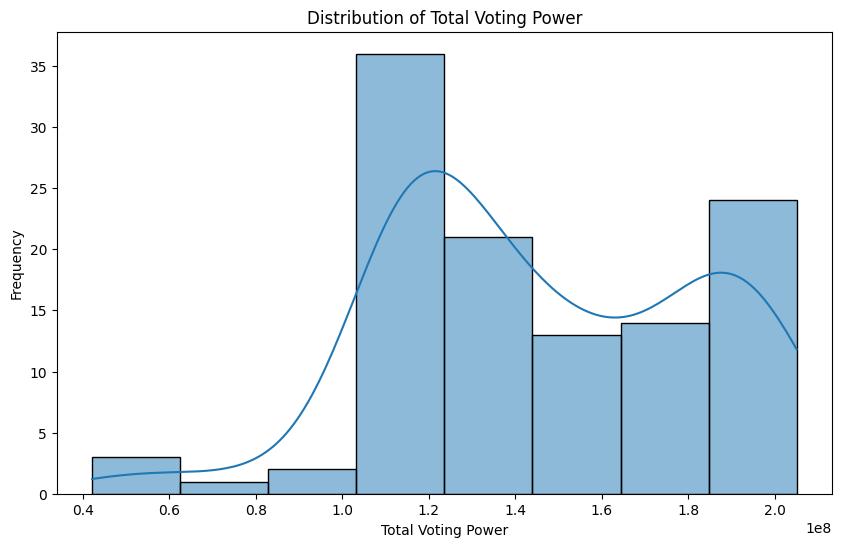

In [45]:
# Create a histogram of the total voting power
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='total_voting_power', kde=True)
plt.title('Distribution of Total Voting Power')
plt.xlabel('Total Voting Power')
plt.ylabel('Frequency')
plt.show()

In [46]:
# Create a scatter plot of the total voting power for each proposal
fig = px.scatter(df2, y='total_voting_power', title='Total Voting Power for Each Proposal', hover_data={'proposal_title': True})

# Conditional coloring for data points with total_voting_power greater than 200M
fig.update_traces(marker=dict(color=['blue' if val > 200_000_000 else 'red' if val < 100_000_000 else 'green' for val in df2['total_voting_power']]))

fig.update_layout(yaxis_title='Total Voting Power')
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(tickvals=list(range(0, int(df2['total_voting_power'].max()) + 20_000_000, 20_000_000)))
fig.show()
fig.write_html(r'Graphs\scatter-plot-proposals.htmk')

In [47]:
# Create a scatter plot of the total voting power for each proposal
fig = px.scatter(df2, y='total_voting_power', title='Total Voting Power for Each Proposal', hover_data={'proposal_title': True})

# Define the legend labels and colors
legend_labels = ['< 100M', '> 200M']
colors = ['red', 'green']
thresholds = [100_000_000, 200_000_000]

# Loop through legend labels and colors to create scatter traces
for label, color, threshold in zip(legend_labels, colors, thresholds):
    if label.startswith('>'):
        filtered_data = df2[df2['total_voting_power'] > threshold]
    else:
        filtered_data = df2[df2['total_voting_power'] < threshold]
    fig.add_scatter(x=filtered_data.index, y=filtered_data['total_voting_power'], mode='markers', 
                    marker=dict(color=color), name=label, legendgroup=label)

fig.update_layout(yaxis_title='Total Voting Power',
                  legend_title='Voting Power')

fig.update_xaxes(showticklabels=False)
fig.update_yaxes(tickvals=list(range(0, int(df2['total_voting_power'].max()) + 20_000_000, 20_000_000)))

fig.show()
fig.write_html(r'Graphs\scatter-plot-proposals.html')

Proposals with total voting power less than 100M

In [48]:
df2[df2['total_voting_power'] < 100000000]

,proposal_title,total_voting_power
61,Proposal to onboard Matrixed.Link as a validat...,5.558155e+07
62,Proposal: Activate support for account abstrac...,6.070424e+07
64,Proposal: Security Council Elections Proposed ...,8.091965e+07
65,Proposal: Update Security Council Election Sta...,8.354867e+07
92,Time Management in ArbitrumÃÂÃÂ¢ÃÂÃÂÃÂ...,4.214652e+07


In [49]:
# Define keywords or patterns for different types of proposals
proposal_types = {
    'STIP': ['STIP'],
    'Governance': ['Governance', 'Foundation', 'DAO'],
    'Funding': ['Funding', 'Treasury'],
    'Election': ['Election', 'Elections']
}

# Function to extract proposal type from proposal title
def extract_proposal_type(title):
    for p_type, keywords in proposal_types.items():
        for keyword in keywords:
            if keyword.lower() in title.lower():
                return p_type
    return 'Other'

# Apply the function to create a new column for proposal type
df2['proposal_type'] = df2['proposal_title'].apply(extract_proposal_type)

f:\Lampros\Analysis of Delegates Voting Patterns in Arbitrum Proposals\Analysis\data_analysis\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



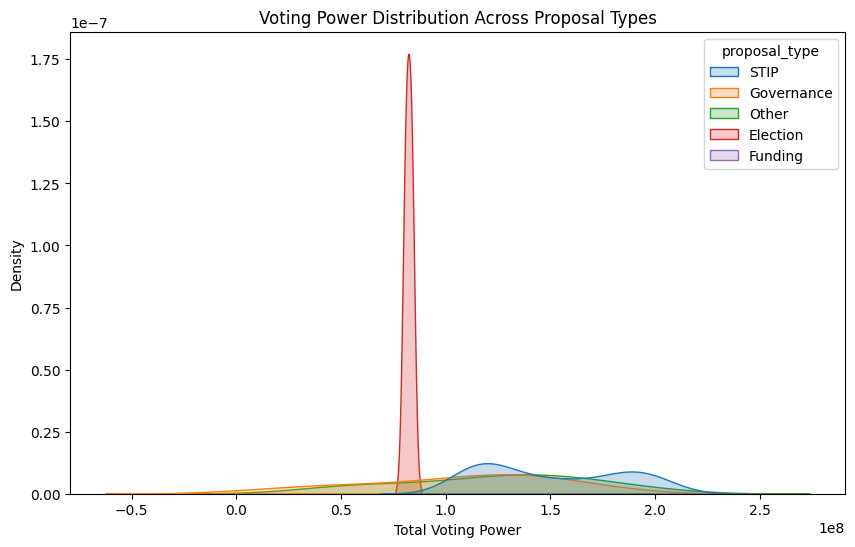

In [50]:
# Plot the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df2, x='total_voting_power', hue='proposal_type', fill=True, common_norm=False, legend=True)
plt.title('Voting Power Distribution Across Proposal Types')
plt.xlabel('Total Voting Power')
plt.ylabel('Density')
plt.show()

From the above graph it can be seen that the distribition of all the different proposal types are very much different from each other.

In [51]:
df2['proposal_type'].value_counts()

STIP          98
Other          9
Governance     4
Election       2
Funding        1
Name: proposal_type, dtype: int64

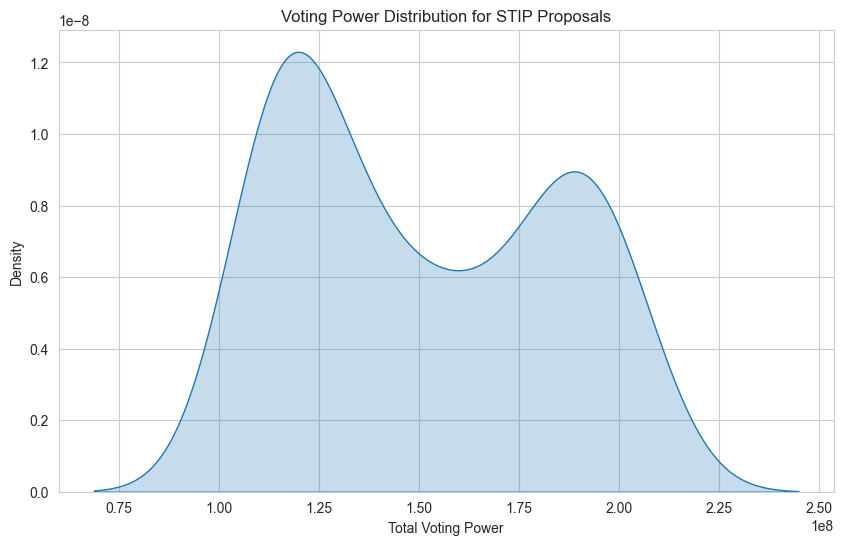

In [52]:
# Filter the DataFrame for a specific proposal type (e.g., 'STIP')
df_stip = df2[df2['proposal_type'] == 'STIP']

# Set the style for seaborn
sns.set_style("whitegrid")

# Plot the KDE plot for the filtered data
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_stip, x='total_voting_power', fill=True)
plt.title('Voting Power Distribution for STIP Proposals')
plt.xlabel('Total Voting Power')
plt.ylabel('Density')
plt.show()

In [53]:
df2[df2['proposal_type'] == 'Funding']

,proposal_title,total_voting_power,proposal_type
109,[Non-Constitutional]: Arbitrum Stable Treasury...,1.327322e+08,Funding


In [54]:
data1.columns

Index(['vote_id', 'voter', 'voting_power', 'vote_date', 'voting_reason',
       'vote_year', 'vote_month', 'vote_day', 'vote_time', 'vote_hour',
       'vote_minute', 'vote_year_month', 'voting_power_range', 'proposal_id',
       'proposal_title', 'proposal_body', 'proposal_type', 'proposal_created',
       'proposal_start_date', 'proposal_end_date', 'proposal_year',
       'proposal_month', 'proposal_day', 'proposal_time', 'proposal_choices',
       'voting_choice', 'mapped_choice'],
      dtype='object')

In [55]:
voting_power = pd.read_csv(r'voting_power_per_day.csv')

In [56]:
voting_power.columns

Index(['proposal_title', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6',
       'day7', 'total_voting_power'],
      dtype='object')

In [57]:
# Convert 'vote_date' and 'proposal_start_date' columns to datetime
data1['vote_date'] = pd.to_datetime(data1['vote_date'])
data1['proposal_start_date'] = pd.to_datetime(data1['proposal_start_date'])

# Create an empty DataFrame to store hourly voting power data
hourly_voting_power = pd.DataFrame()

# Iterate over each proposal
for proposal_title, proposal_group in data1.groupby('proposal_title'):
    # Generate hourly timestamps from proposal start date to end date
    hourly_timestamps = pd.date_range(start=proposal_group['proposal_start_date'].iloc[0], 
                                       end=proposal_group['proposal_end_date'].iloc[0], 
                                       freq='H')
    # Calculate voting power for each proposal within each hour
    hourly_voting_power_list = []
    for timestamp in hourly_timestamps:
        hour_votes = proposal_group[(proposal_group['vote_date'] >= timestamp) & 
                                    (proposal_group['vote_date'] < timestamp + pd.Timedelta(hours=1))]
        hour_voting_power = hour_votes['voting_power'].sum()
        hourly_voting_power_list.append(hour_voting_power)
    
    # Create a DataFrame for hourly voting power for the current proposal
    proposal_hourly_power = pd.DataFrame({'proposal_title': proposal_title,
                                          'hourly_timestamp': hourly_timestamps,
                                          'voting_power': hourly_voting_power_list})
    
    # Append the proposal's hourly data to the main DataFrame
    hourly_voting_power = pd.concat([hourly_voting_power, proposal_hourly_power], ignore_index=True)

# Display the resulting DataFrame
hourly_voting_power

,proposal_title,hourly_timestamp,voting_power
0,0xGen STIP Proposal - Round 1,2023-10-06 02:00:00,1.320774e+02
1,0xGen STIP Proposal - Round 1,2023-10-06 03:00:00,1.026296e+04
2,0xGen STIP Proposal - Round 1,2023-10-06 04:00:00,4.456380e+04
3,0xGen STIP Proposal - Round 1,2023-10-06 05:00:00,1.793468e+04
4,0xGen STIP Proposal - Round 1,2023-10-06 06:00:00,8.993829e+03
...,...,...,...
19261,unshETH STIP Proposal - Round 1,2023-10-12 22:00:00,2.802519e+05
19262,unshETH STIP Proposal - Round 1,2023-10-12 23:00:00,2.516479e+07
19263,unshETH STIP Proposal - Round 1,2023-10-13 00:00:00,1.288717e+04
19264,unshETH STIP Proposal - Round 1,2023-10-13 01:00:00,5.391375e+05


In [58]:
# Extract hour from hourly_timestamp
hourly_voting_power['hour'] = hourly_voting_power['hourly_timestamp'].dt.hour

# Group data by hour and proposal title, sum voting power
hourly_voting_power_agg = hourly_voting_power.groupby(['hour', 'proposal_title']).sum().reset_index()

# Pivot the table to have hours as columns and proposal titles as rows
hourly_voting_power_pivot = hourly_voting_power_agg.pivot(index='proposal_title', columns='hour', values='voting_power').reset_index()

# Add the total for each hour
hourly_voting_power_pivot['Total'] = hourly_voting_power_pivot.sum(axis=1)

hourly_voting_power_pivot

f:\Lampros\Analysis of Delegates Voting Patterns in Arbitrum Proposals\Analysis\data_analysis\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



hour,proposal_title,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,Total
0,0xGen STIP Proposal - Round 1,8.801792e+05,3.568478e+05,9.720806e+05,5.505071e+05,6.913613e+05,2.882150e+06,3.227453e+05,2.071280e+05,1.096872e+06,...,1.048463e+06,1.113282e+05,1.021087e+06,1.243237e+07,6.022782e+05,5.502533e+07,6.681169e+06,1.043903e+07,7.399111e+04,1.126770e+08
1,AIP 1.05: Return 700M $ARB to the DAO Treasury...,1.485450e+06,1.873827e+07,1.520239e+06,2.743983e+06,2.447012e+06,5.765240e+06,2.728605e+06,2.457803e+06,1.339348e+06,...,6.137461e+06,7.528334e+06,1.075548e+06,2.798121e+06,2.025317e+07,5.665856e+06,1.511014e+06,2.139129e+06,7.208893e+05,1.408547e+08
2,"AIP-1.1 - Lockup, Budget, Transparency",6.129077e+06,1.220000e+06,1.455507e+07,1.692077e+06,1.443075e+06,1.001496e+06,1.540096e+06,4.824390e+06,2.274200e+06,...,1.052677e+06,7.534155e+06,1.833773e+06,2.651557e+07,3.212991e+06,2.102881e+07,9.263639e+06,2.036270e+06,3.128971e+06,1.396229e+08
3,AIP-1.2 - Foundation and DAO Governance,6.290567e+06,1.215624e+06,1.456931e+07,1.704946e+06,9.170083e+05,1.583300e+06,1.579573e+06,3.703516e+06,2.272817e+06,...,1.091874e+06,7.543661e+06,1.856808e+06,2.650525e+07,3.196479e+06,2.104909e+07,7.961228e+06,2.722169e+06,2.968355e+06,1.387616e+08
4,AIP-1: Arbitrum Improvement Proposal Framework,1.957272e+06,3.189060e+06,6.864530e+06,3.723602e+06,3.002297e+06,1.956511e+07,4.335544e+06,1.803871e+06,1.257287e+06,...,1.556301e+07,6.822662e+06,8.741481e+06,7.888369e+06,2.524060e+07,2.434437e+06,3.917275e+06,3.782514e+05,1.310846e+06,1.308752e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,[Non-Constitutional]: Arbitrum Stable Treasury...,2.137769e+05,4.682595e+06,5.661587e+05,5.444552e+06,8.116986e+04,2.676461e+05,1.384355e+05,1.017910e+05,6.684779e+05,...,2.959170e+07,4.637059e+05,1.305551e+06,1.947764e+05,8.629777e+06,9.580625e+06,1.617490e+05,9.375886e+06,9.823182e+06,1.327322e+08
110,dForce STIP Proposal - Round 1,8.361941e+05,1.166368e+06,1.015258e+06,1.471808e+07,1.499753e+05,7.248422e+06,3.701413e+06,2.217724e+05,1.002428e+06,...,5.350549e+06,1.481976e+06,9.720102e+05,2.301394e+05,2.060514e+06,2.901149e+07,2.036177e+07,1.304916e+07,8.266283e+04,1.395754e+08
111,iZUMi STIP Proposal - Round 1,1.026478e+06,5.002438e+06,1.451512e+06,4.364374e+06,8.867364e+05,7.676112e+06,3.552847e+06,3.173746e+06,3.220237e+06,...,1.884411e+06,1.678587e+05,2.743898e+06,2.582254e+06,2.157004e+06,5.854932e+07,1.491928e+05,1.402100e+07,8.232625e+04,1.548327e+08
112,tBTC STIP Proposal - Round 1,3.234941e+04,1.626642e+06,9.661297e+05,1.277006e+07,1.332331e+05,4.434347e+06,3.138702e+05,3.556563e+06,1.844453e+05,...,6.355507e+05,1.050263e+05,9.658514e+05,2.338338e+05,1.806821e+06,3.155078e+07,1.232046e+07,5.626890e+04,8.630808e+04,1.106967e+08


In [59]:
hourly_voting_power_pivot.columns

Index(['proposal_title',                0,                1,                2,
                      3,                4,                5,                6,
                      7,                8,                9,               10,
                     11,               12,               13,               14,
                     15,               16,               17,               18,
                     19,               20,               21,               22,
                     23,          'Total'],
      dtype='object', name='hour')

In [60]:
# Filter hourly voting power data for a specific proposal
proposal_data = hourly_voting_power[hourly_voting_power['proposal_title'] == '0xGen STIP Proposal - Round 1']

# Create an interactive line plot
fig = px.line(proposal_data, x='hourly_timestamp', y='voting_power', title='Hourly Voting Power for Proposal: 0xGen STIP Proposal - Round 1',
              labels={'hourly_timestamp': 'Hourly Timestamp', 'hourly_voting_power': 'Hourly Voting Power'})
fig.update_traces(mode='lines')
fig.show()

In [61]:
# Create a list of unique proposal titles
proposals = hourly_voting_power_pivot['proposal_title'].unique()

# Create a stream graph
fig = go.Figure()

for proposal in proposals:
    fig.add_trace(go.Scatter(
        x=hourly_voting_power_pivot.columns[1:-1],  # Exclude 'proposal_title' column
        y=hourly_voting_power_pivot[hourly_voting_power_pivot['proposal_title'] == proposal].iloc[:, 1:].values.flatten(),
        stackgroup='one',
        name=proposal
    ))

fig.update_layout(title='Stream Graph of Hourly Voting Power for All Proposals',
                  xaxis_title='Hour of the Day',
                  yaxis_title='Hourly Voting Power')

fig.update_layout(showlegend=False)
fig.show()
fig.write_html(r'Graphs\stream-hourly-voting-power.html')

In [62]:
# Extract hour from hourly_timestamp
hourly_voting_power['hour'] = hourly_voting_power['hourly_timestamp'].dt.hour

# Extract date from hourly_timestamp
hourly_voting_power['date'] = hourly_voting_power['hourly_timestamp'].dt.date

# Group data by hour, date, and proposal title, sum voting power
hourly_voting_power_agg = hourly_voting_power.groupby(['hour', 'date', 'proposal_title']).sum().reset_index()

# Pivot the table to have hours as columns, dates as rows, and proposal titles as values
hourly_voting_power_pivot = hourly_voting_power_agg.pivot_table(index=['date', 'proposal_title'], columns='hour', values='voting_power', aggfunc='sum').reset_index()

# Add the total for each day
hourly_voting_power_pivot['Total'] = hourly_voting_power_pivot.sum(axis=1)

hourly_voting_power_pivot

f:\Lampros\Analysis of Delegates Voting Patterns in Arbitrum Proposals\Analysis\data_analysis\lib\site-packages\ipykernel_launcher.py:14: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



hour,date,proposal_title,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,Total
0,2023-03-27,AIP-1: Arbitrum Improvement Proposal Framework,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00
1,2023-03-28,AIP-1: Arbitrum Improvement Proposal Framework,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
2,2023-03-29,AIP-1: Arbitrum Improvement Proposal Framework,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,4.791568,6.603058,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,1.139463e+01
3,2023-03-30,AIP-1: Arbitrum Improvement Proposal Framework,6580.053365,2.348949e+05,937431.918465,7.282673e+05,705013.045709,570957.200386,601473.006286,1.048590e+06,...,4.027248e+05,2.443937e+05,322862.335104,160366.650980,1.008695e+05,1.301815e+05,94661.438925,122756.710479,5.920254e+04,1.002818e+07
4,2023-03-31,AIP-1: Arbitrum Improvement Proposal Framework,156705.739765,2.154558e+05,321311.087445,1.998486e+05,122702.476201,135168.005455,128371.130134,1.037739e+05,...,1.099875e+05,2.289850e+06,61219.221320,46491.735942,1.425958e+05,6.299895e+04,216886.177572,26325.795069,4.454298e+04,5.250821e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,2024-02-03,[Non-Constitutional]: Arbitrum Stable Treasury...,37389.883203,2.864643e+03,511293.539440,3.113840e+06,4708.758742,4250.395402,12468.911688,1.065362e+04,...,1.851853e+04,1.476738e+04,79132.201763,5209.581565,9.976265e+03,1.168177e+04,18085.153467,9608.381907,2.745324e+03,5.083385e+06
908,2024-02-04,[Non-Constitutional]: Arbitrum Stable Treasury...,4410.777209,9.832006e+02,908.712552,5.516018e+03,8638.740654,177917.446734,34415.118592,1.829215e+04,...,6.808985e+03,1.366625e+04,13702.597464,11790.741276,9.764326e+03,1.101606e+06,22316.423295,7366.280756,1.498834e+04,1.626393e+06
909,2024-02-05,[Non-Constitutional]: Arbitrum Stable Treasury...,4351.829901,1.636269e+03,3028.441041,3.160498e+03,19374.354443,47000.301944,3344.453392,9.756917e+03,...,4.442998e+04,1.712937e+04,911683.588497,5628.503504,5.838505e+03,2.024561e+04,9605.175323,4835.155146,7.313733e+02,3.717402e+06
910,2024-02-06,[Non-Constitutional]: Arbitrum Stable Treasury...,4597.087954,1.768286e+01,4772.835003,1.557604e+03,3417.703306,11893.867703,949.937706,3.282754e+03,...,2.279098e+07,3.370172e+05,40100.842840,4731.443836,1.061320e+04,1.271179e+03,3898.166050,527534.010654,2.740770e+06,2.691478e+07


In [63]:
hourly_voting_power_pivot['date'] = pd.to_datetime(hourly_voting_power_pivot['date'])

In [64]:
hourly_voting_power_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            912 non-null    datetime64[ns]
 1   proposal_title  912 non-null    object        
 2   0               799 non-null    float64       
 3   1               799 non-null    float64       
 4   2               895 non-null    float64       
 5   3               798 non-null    float64       
 6   4               799 non-null    float64       
 7   5               798 non-null    float64       
 8   6               798 non-null    float64       
 9   7               798 non-null    float64       
 10  8               798 non-null    float64       
 11  9               798 non-null    float64       
 12  10              798 non-null    float64       
 13  11              798 non-null    float64       
 14  12              798 non-null    float64       
 15  13    

## Do voters with higher voting power tend to vote more frequently or actively participate in the voting process?

In [66]:
voters_with_high_voting_power.shape

(53, 115)

In [73]:
voters = voters_with_high_voting_power['voter'].to_list()

In [67]:
data1.columns

Index(['vote_id', 'voter', 'voting_power', 'vote_date', 'voting_reason',
       'vote_year', 'vote_month', 'vote_day', 'vote_time', 'vote_hour',
       'vote_minute', 'vote_year_month', 'voting_power_range', 'proposal_id',
       'proposal_title', 'proposal_body', 'proposal_type', 'proposal_created',
       'proposal_start_date', 'proposal_end_date', 'proposal_year',
       'proposal_month', 'proposal_day', 'proposal_time', 'proposal_choices',
       'voting_choice', 'mapped_choice'],
      dtype='object')

In [70]:
# Group the data by 'voter' and count the total votes for each voter
vote_counts = data1.groupby('voter')['proposal_title'].count().reset_index(name='total_proposals_participated')

In [72]:
vote_counts.columns

Index(['voter', 'total_proposals_participated'], dtype='object')

In [75]:
# Convert 'voters' list to set for faster lookup
voters = set(voters)

# Filter the data for high power voters
filtered_data = vote_counts[vote_counts['voter'].isin(voters)]

In [76]:
filtered_data.shape

(53, 2)

In [77]:
filtered_data

,voter,total_proposals_participated
5497,0x09D4083fFD20D21ACb9118465aD7C52Ac8B548f7,1
9107,0x0eB5B03c0303f2F47cD81d7BE4275AF8Ed347576,108
10898,0x11cd09a0c5B1dc674615783b0772a9bFD53e3A8F,4
12009,0x13BDaE8c5F0fC40231F0E6A4ad70196F59138548,56
14840,0x18BF1a97744539a348304E9d266aAc7d446a1582,104
15036,0x190473B3071946df65306989972706A4c006A561,105
15972,0x1B686eE8E31c5959D9F5BBd8122a58682788eeaD,111
17773,0x1be2655C587C39610751176ce3C6f3c7018D61c1,3
20572,0x22aA1F4173b826451763EbfCE22cf54A0603163c,85
27342,0x2e3BEf6830Ae84bb4225D318F9f61B6b88C147bF,39


In [86]:
filtered_data['votes%'] = round((filtered_data['total_proposals_participated'] / 114) * 100, 2)

f:\Lampros\Analysis of Delegates Voting Patterns in Arbitrum Proposals\Analysis\data_analysis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
filtered_data

,voter,total_proposals_participated,votes%
5497,0x09D4083fFD20D21ACb9118465aD7C52Ac8B548f7,1,0.88
9107,0x0eB5B03c0303f2F47cD81d7BE4275AF8Ed347576,108,94.74
10898,0x11cd09a0c5B1dc674615783b0772a9bFD53e3A8F,4,3.51
12009,0x13BDaE8c5F0fC40231F0E6A4ad70196F59138548,56,49.12
14840,0x18BF1a97744539a348304E9d266aAc7d446a1582,104,91.23
15036,0x190473B3071946df65306989972706A4c006A561,105,92.11
15972,0x1B686eE8E31c5959D9F5BBd8122a58682788eeaD,111,97.37
17773,0x1be2655C587C39610751176ce3C6f3c7018D61c1,3,2.63
20572,0x22aA1F4173b826451763EbfCE22cf54A0603163c,85,74.56
27342,0x2e3BEf6830Ae84bb4225D318F9f61B6b88C147bF,39,34.21


In [88]:
filtered_data.columns

Index(['voter', 'total_proposals_participated', 'votes%'], dtype='object')

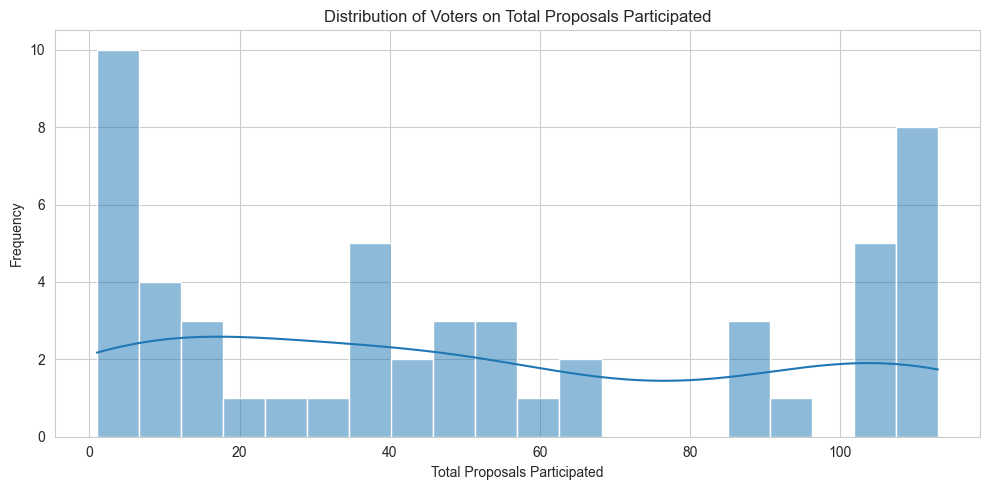

In [98]:
# Visualize the distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=filtered_data, 
             x='total_proposals_participated', bins=20, kde=True)
plt.title('Distribution of Voters on Total Proposals Participated')
plt.xlabel('Total Proposals Participated')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [102]:
# Sort the dataframe by 'total_proposals_participated' in descending order
df_sorted = filtered_data.sort_values(by='total_proposals_participated', ascending=False)

# Create the bar chart using Plotly
fig = px.bar(df_sorted, x='voter', y='total_proposals_participated', color='total_proposals_participated',
             labels={'voter': 'Voter', 'total_proposals_participated': 'Total Proposals Participated'},
             title='Number of Proposals Participated by Each Voter with High Voting Power')

# Remove x-ticks
fig.update_xaxes(showticklabels=False)

# Show the interactive plot
fig.show()
fig.write_html(r'Graphs\voter-engagement.html')

In [106]:
# Calculate the mean of total proposals participated
mean_total_proposals = df_sorted['total_proposals_participated'].mean()

# Create the bar chart using Plotly
fig = px.bar(df_sorted, x='voter', y='total_proposals_participated', color='total_proposals_participated',
             labels={'voter': 'Voter', 'total_proposals_participated': 'Total Proposals Participated'},
             title='Number of Proposals Participated by Each Voter with High Voting Power')

# Remove x-ticks
fig.update_xaxes(showticklabels=False)

# Add a line representing the mean
fig.add_trace(go.Scatter(x=df_sorted['voter'], y=[mean_total_proposals] * len(df_sorted),
                         mode='lines', name='Mean', line=dict(color='red', dash='dash'),
                         showlegend=False, hoverinfo='skip',
                         text=[f'Mean: {mean_total_proposals:.2f}'] * len(df_sorted)))

# Show the interactive plot
fig.show()
fig.write_html(r'Graphs\voter-engagement.html')